In [ ]:
import tensorflow as tf

print(tf.__version__)

physical_devices = tf.config.list_physical_devices('GPU')
print("GPUs Available: ", physical_devices)

if physical_devices:
    try:
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2.18.0
GPUs Available:  []


In [ ]:
import os
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

# Import dari tensorflow/keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Kelas

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Input


# Menampilkan kelas yang ada dalam dataset
print("Kelas yang ada dalam dataset pelatihan:")
for class_name, class_index in train_generator.class_indices.items():
    print(f"Kelas {class_index}: {class_name}")

# Jumlah kelas
num_classes = len(train_generator.class_indices)
print(f"Jumlah kelas: {num_classes}")

# Pengembangan Model MobileNetV2
input_tensor = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

# Anda bisa melanjutkan kode model dengan base_model ini sesuai kebutuhan.


Kelas yang ada dalam dataset pelatihan:
Kelas 0: batik-bali
Kelas 1: batik-betawi
Kelas 2: batik-celup
Kelas 3: batik-cendrawasih
Kelas 4: batik-ceplok
Kelas 5: batik-dayak
Kelas 6: batik-geblek renteng
Kelas 7: batik-insang
Kelas 8: batik-kawung
Kelas 9: batik-lasem
Kelas 10: batik-lontara
Kelas 11: batik-megamendung
Kelas 12: batik-pala
Kelas 13: batik-parang
Kelas 14: batik-poleng
Kelas 15: batik-sidomukti
Kelas 16: batik-tambal
Kelas 17: batik-toraja
Kelas 18: batik-truntum
Jumlah kelas: 19


<ipython-input-11-d024f4e0feeb>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import os

# Fungsi untuk menghitung jumlah gambar di setiap folder
def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if f.endswith(('jpg', 'png', 'jpeg'))])

# Fungsi untuk menghitung total gambar untuk setiap kelas
def count_class_images(base_path, class_name):
    # Path untuk masing-masing subfolder train, validation, dan test
    train_folder = os.path.join(base_path, 'Train', class_name)
    valid_folder = os.path.join(base_path, 'Validation', class_name)
    test_folder = os.path.join(base_path, 'Test', class_name)

    # Menghitung gambar di setiap folder
    train_images = count_images_in_folder(train_folder)
    valid_images = count_images_in_folder(valid_folder)
    test_images = count_images_in_folder(test_folder)

    # Mengembalikan total gambar per kelas
    total_images = train_images + valid_images + test_images
    return train_images, valid_images, test_images, total_images

# Path ke direktori dataset Anda
DATA_DIR = '/content/drive/MyDrive/Firman/Batik Nusantara'

# Daftar nama kelas yang ada sesuai dengan penulisan kelas batik
class_names = [
    'batik-bali', 'batik-betawi', 'batik-celup', 'batik-cendrawasih', 'batik-ceplok',
    'batik-dayak', 'batik-geblek renteng', 'batik-insang', 'batik-kawung', 'batik-lasem',
    'batik-lontara', 'batik-megamendung', 'batik-pala', 'batik-parang', 'batik-poleng',
    'batik-sidomukti', 'batik-tambal', 'batik-toraja', 'batik-truntum'
]

# Iterasi untuk setiap kelas dan tampilkan jumlah gambar
for idx, class_name in enumerate(class_names):
    train, valid, test, total = count_class_images(DATA_DIR, class_name)
    print(f"Kelas {idx}: {class_name.capitalize()}:")
    print(f"  Train: {train} images")
    print(f"  Validation: {valid} images")
    print(f"  Test: {test} images")
    print(f"  Total: {total} images")
    print("-" * 40)


Kelas 0: Batik-bali:
  Train: 47 images
  Validation: 5 images
  Test: 6 images
  Total: 58 images
----------------------------------------
Kelas 1: Batik-betawi:
  Train: 50 images
  Validation: 6 images
  Test: 6 images
  Total: 62 images
----------------------------------------
Kelas 2: Batik-celup:
  Train: 51 images
  Validation: 6 images
  Test: 6 images
  Total: 63 images
----------------------------------------
Kelas 3: Batik-cendrawasih:
  Train: 51 images
  Validation: 6 images
  Test: 6 images
  Total: 63 images
----------------------------------------
Kelas 4: Batik-ceplok:
  Train: 50 images
  Validation: 6 images
  Test: 6 images
  Total: 62 images
----------------------------------------
Kelas 5: Batik-dayak:
  Train: 50 images
  Validation: 6 images
  Test: 6 images
  Total: 62 images
----------------------------------------
Kelas 6: Batik-geblek renteng:
  Train: 47 images
  Validation: 6 images
  Test: 6 images
  Total: 59 images
--------------------------------------

#Pre-Proccessing

In [ ]:
# Konfigurasi
DATA_DIR = '/content/drive/MyDrive/Firman/Batik Nusantara'
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
BATCH_SIZE = 32
GPU_DEVICE = '/GPU:0'

In [ ]:
train_datagen = ImageDataGenerator(
   preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
# Membuat generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Train'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123
)

# Membuat generator untuk data validasi
validation_generator = val_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Validation'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=123
)

# Membuat generator untuk data pengujian
test_generator = val_datagen.flow_from_directory(
    directory=os.path.join(DATA_DIR, 'Test'),
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=123
)

# Jumlah kelas
num_classes = len(train_generator.class_indices)

Found 941 images belonging to 19 classes.
Found 113 images belonging to 19 classes.
Found 114 images belonging to 19 classes.


#Pengembangan Model MobileNetV2

In [ ]:
from tensorflow.keras import Input
num_classes = train_generator.num_classes

input_tensor = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
base_model = MobileNetV2(input_tensor=input_tensor,
                         include_top=False,
                         weights='imagenet')

<ipython-input-6-d3d5d5af6efe>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=input_tensor,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#Pengujian Hyperparameter

##Learning Rate

###Learning Rate 1e-2

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 871ms/step - accuracy: 0.3390 - loss: 3.3054 - val_accuracy: 0.4867 - val_loss: 5.0818
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 525ms/step - accuracy: 0.7248 - loss: 2.3729 - val_accuracy: 0.6726 - val_loss: 2.8813
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 532ms/step - accuracy: 0.8259 - loss: 1.7764 - val_accuracy: 0.6637 - val_loss: 2.2232
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 501ms/step - accuracy: 0.8777 - loss: 1.4084 - val_accuracy: 0.6637 - val_loss: 2.0326
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 514ms/step - accuracy: 0.8048 - loss: 1.5876 - val_accuracy: 0.6991 - val_loss: 2.4406
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.7899 - loss: 1.7095 - val_accuracy: 0.5664 - val_loss: 3.2266
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.8319 - loss: 1.5822 - val_accuracy: 0.4602 - val_loss: 3.5797
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step - accuracy: 0.8388 - loss: 1.6101 - val_accu

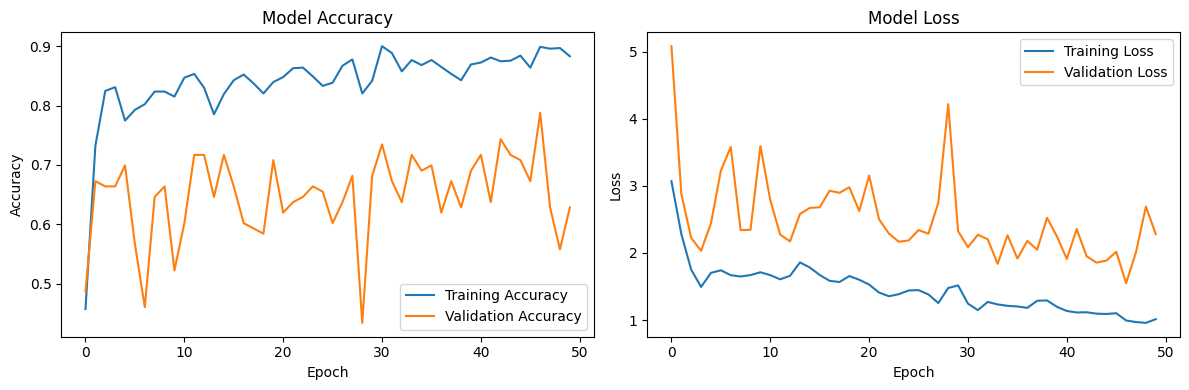

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.6232 - loss: 2.2371
Test Loss (Sebelum Fine-Tuning): 2.2809
Test Accuracy (Sebelum Fine-Tuning): 0.63
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step - accuracy: 0.6157 - loss: 2.2222
Test Loss (Sebelum Fine-Tuning): 2.2597
Test Accuracy (Sebelum Fine-Tuning): 0.60


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Learning rate 1e-3

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.1975 - loss: 3.5542

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 991ms/step - accuracy: 0.2070 - loss: 3.5125 - val_accuracy: 0.5398 - val_loss: 2.2380
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 507ms/step - accuracy: 0.7147 - loss: 1.5995 - val_accuracy: 0.7434 - val_loss: 1.7410
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 493ms/step - accuracy: 0.8338 - loss: 1.2454 - val_accuracy: 0.7611 - val_loss: 1.4770
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 486ms/step - accuracy: 0.9188 - loss: 0.9922 - val_accuracy: 0.7788 - val_loss: 1.3668
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 479ms/step - accuracy: 0.9296 - loss: 0.9085 - val_accuracy: 0.7965 - val_loss: 1.2802
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step - accuracy: 0.9568 - loss: 0.8194 - val_accuracy: 0.8319 - val_loss: 1.2119
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 496ms/step - accuracy: 0.9527 - loss: 0.7819 - val_accuracy: 0.7876 - val_loss: 1.2567
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.9769 - loss: 0.7134 - val_accuracy: 0.805

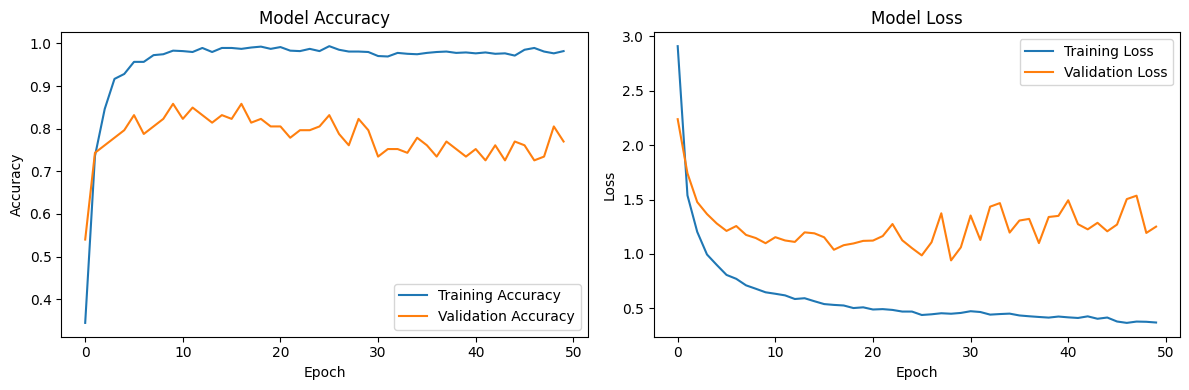

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - accuracy: 0.8038 - loss: 1.0839
Test Loss (Sebelum Fine-Tuning): 1.2513
Test Accuracy (Sebelum Fine-Tuning): 0.77
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8026 - loss: 1.1109
Test Loss (Sebelum Fine-Tuning): 1.2035
Test Accuracy (Sebelum Fine-Tuning): 0.80


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Learning Rate 1e-4

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/30 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0746 - loss: 4.2441 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 393s 10s/step - accuracy: 0.0757 - loss: 4.2283 - val_accuracy: 0.1150 - val_loss: 3.3497
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 73s 468ms/step - accuracy: 0.2125 - loss: 3.2538 - val_accuracy: 0.2301 - val_loss: 3.0031
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 484ms/step - accuracy: 0.4202 - loss: 2.6317 - val_accuracy: 0.3628 - val_loss: 2.6897
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 485ms/step - accuracy: 0.4920 - loss: 2.3344 - val_accuracy: 0.4956 - val_loss: 2.4403
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 477ms/step - accuracy: 0.5411 - loss: 2.1616 - val_accuracy: 0.5398 - val_loss: 2.2103
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 490ms/step - accuracy: 0.6467 - loss: 1.9532 - val_accuracy: 0.6018 - val_loss: 2.0405
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 485ms/step - accuracy: 0.6728 - loss: 1.8497 - val_accuracy: 0.6549 - val_loss: 1.9176
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.7186 - loss: 1.6839 - val_accuracy: 0.6903

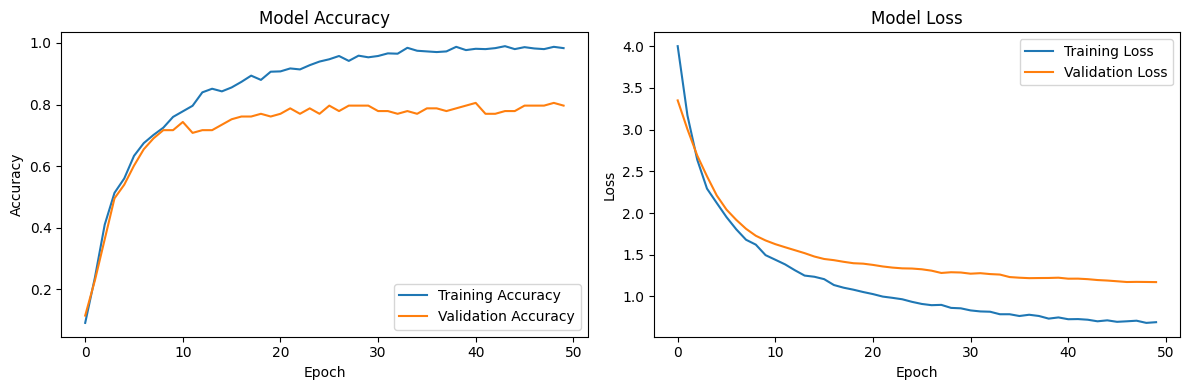

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.8238 - loss: 1.1218
Test Loss (Sebelum Fine-Tuning): 1.1719
Test Accuracy (Sebelum Fine-Tuning): 0.80
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.7991 - loss: 1.2331
Test Loss (Sebelum Fine-Tuning): 1.2799
Test Accuracy (Sebelum Fine-Tuning): 0.79


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=35,
        validation_data=validation_generator,
    )

Epoch 1/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 908ms/step - accuracy: 0.0728 - loss: 3.6318 - val_accuracy: 0.1239 - val_loss: 2.8135
Epoch 2/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 634ms/step - accuracy: 0.1897 - loss: 2.8050 - val_accuracy: 0.2920 - val_loss: 2.4646
Epoch 3/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 634ms/step - accuracy: 0.3334 - loss: 2.1886 - val_accuracy: 0.3805 - val_loss: 2.1751
Epoch 4/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 619ms/step - accuracy: 0.4561 - loss: 1.8719 - val_accuracy: 0.4602 - val_loss: 1.9292
Epoch 5/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 586ms/step - accuracy: 0.5469 - loss: 1.6147 - val_accuracy: 0.5044 - val_loss: 1.7247
Epoch 6/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 601ms/step - accuracy: 0.6246 - loss: 1.3715 - val_accuracy: 0.5221 - val_loss: 1.5638
Epoch 7/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 601ms/step - accuracy: 0.6787 - loss: 1.2542 - val_accuracy: 0.6018 - val_loss: 1.4278
Epoch 8/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 605ms/step - accuracy: 0.6974 - loss: 1.1168 - val_accu

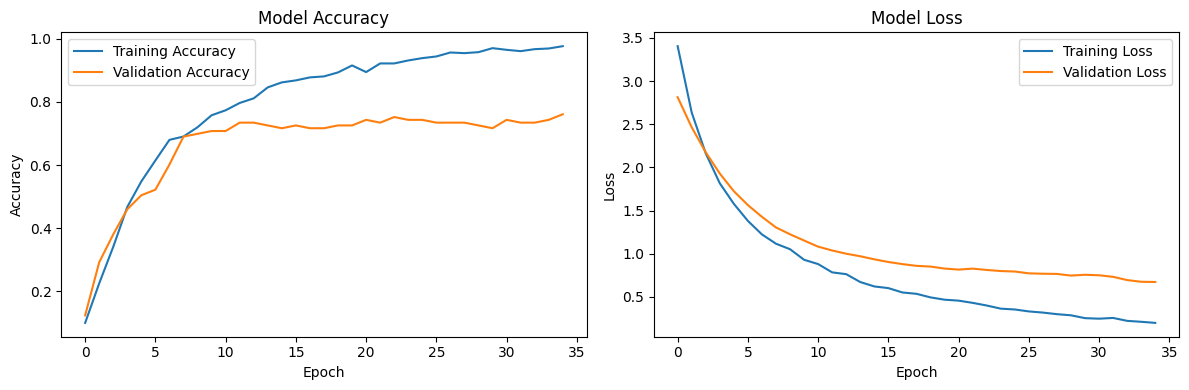

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.8075 - loss: 0.5905
Test Loss (Sebelum Fine-Tuning): 0.6730
Test Accuracy (Sebelum Fine-Tuning): 0.76
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.8130 - loss: 0.6990
Test Loss (Sebelum Fine-Tuning): 0.7182
Test Accuracy (Sebelum Fine-Tuning): 0.80


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 726ms/step - accuracy: 0.0787 - loss: 3.4561 - val_accuracy: 0.1150 - val_loss: 2.8560
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 490ms/step - accuracy: 0.2016 - loss: 2.7336 - val_accuracy: 0.2566 - val_loss: 2.5005
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.3722 - loss: 2.1705 - val_accuracy: 0.3274 - val_loss: 2.2055
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 496ms/step - accuracy: 0.4351 - loss: 1.9050 - val_accuracy: 0.4425 - val_loss: 1.9746
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 494ms/step - accuracy: 0.5533 - loss: 1.6005 - val_accuracy: 0.4867 - val_loss: 1.7831
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 518ms/step - accuracy: 0.6154 - loss: 1.3530 - val_accuracy: 0.5752 - val_loss: 1.6205
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 504ms/step - accuracy: 0.6777 - loss: 1.1788 - val_accuracy: 0.5752 - val_loss: 1.5051
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step - accuracy: 0.7057 - loss: 1.1479 - val_accu

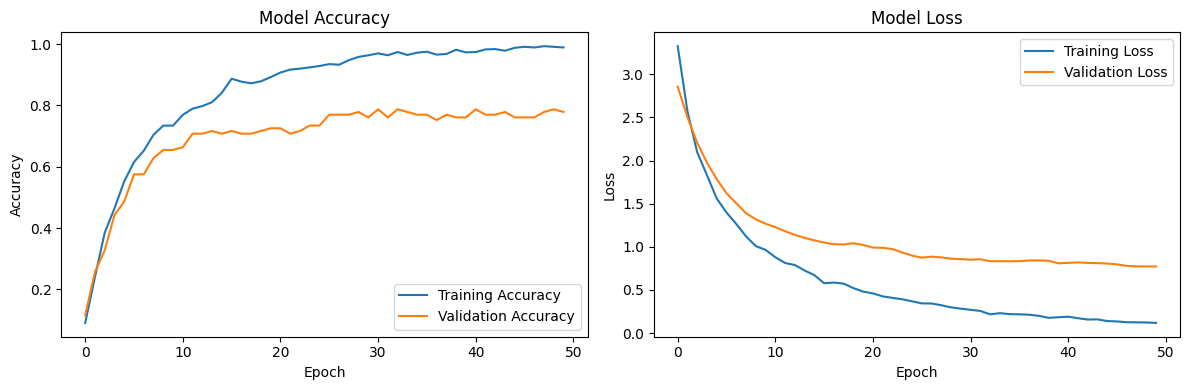

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 468ms/step - accuracy: 0.7959 - loss: 0.7266
Test Loss validation(Sebelum Fine-Tuning): 0.7722
Test Accuracy validation(Sebelum Fine-Tuning): 0.78
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7796 - loss: 0.6719
Test Loss TEST(Sebelum Fine-Tuning): 0.7167
Test Accuracy TEST(Sebelum Fine-Tuning): 0.77


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss validation(Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy validation(Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss TEST(Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy TEST(Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Learning Rate Ie-5

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 753ms/step - accuracy: 0.0562 - loss: 4.3399 - val_accuracy: 0.0442 - val_loss: 3.8180
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 492ms/step - accuracy: 0.0371 - loss: 4.2471 - val_accuracy: 0.0619 - val_loss: 3.7886
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 495ms/step - accuracy: 0.0537 - loss: 4.1707 - val_accuracy: 0.0619 - val_loss: 3.7729
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 507ms/step - accuracy: 0.0546 - loss: 4.0588 - val_accuracy: 0.0619 - val_loss: 3.7618
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 485ms/step - accuracy: 0.0854 - loss: 4.0299 - val_accuracy: 0.0619 - val_loss: 3.7488
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 493ms/step - accuracy: 0.0990 - loss: 3.9070 - val_accuracy: 0.0708 - val_loss: 3.7330
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.1358 - loss: 3.7882 - val_accuracy: 0.0708 - val_loss: 3.7101
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 513ms/step - accuracy: 0.0927 - loss: 3.7258 - val_accu

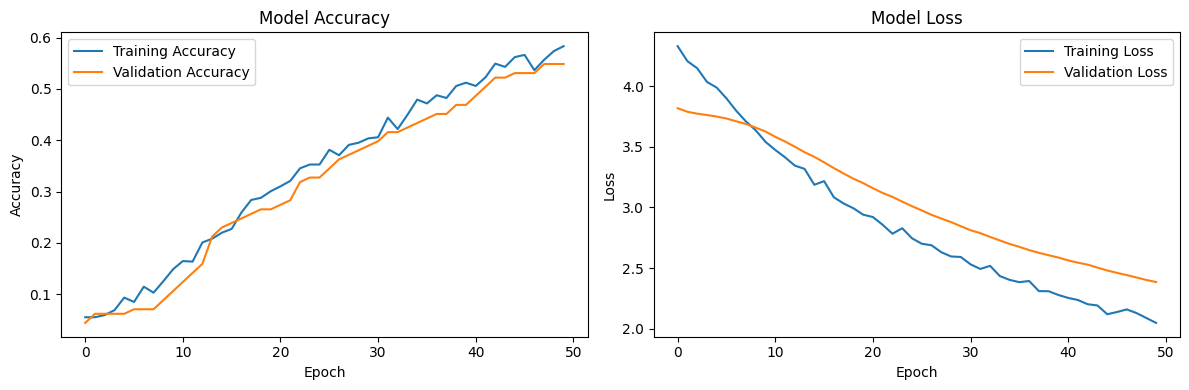

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5278 - loss: 2.3620
Test Loss (Sebelum Fine-Tuning): 2.3851
Test Accuracy (Sebelum Fine-Tuning): 0.55
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - accuracy: 0.5077 - loss: 2.2946
Test Loss (Sebelum Fine-Tuning): 2.3609
Test Accuracy (Sebelum Fine-Tuning): 0.51


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Batch Size

###32

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 892ms/step - accuracy: 0.0458 - loss: 6.3275 - val_accuracy: 0.1770 - val_loss: 3.0529
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 503ms/step - accuracy: 0.1254 - loss: 4.7159 - val_accuracy: 0.4336 - val_loss: 2.5049
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 497ms/step - accuracy: 0.1883 - loss: 4.1193 - val_accuracy: 0.5575 - val_loss: 2.1452
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 496ms/step - accuracy: 0.2410 - loss: 3.8864 - val_accuracy: 0.6195 - val_loss: 1.9732
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 487ms/step - accuracy: 0.2727 - loss: 3.3466 - val_accuracy: 0.6726 - val_loss: 1.8685
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 480ms/step - accuracy: 0.3444 - loss: 3.0258 - val_accuracy: 0.6814 - val_loss: 1.8009
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 485ms/step - accuracy: 0.3504 - loss: 2.8477 - val_accuracy: 0.6903 - val_loss: 1.7637
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 500ms/step - accuracy: 0.4443 - loss: 2.6423 - val_accu

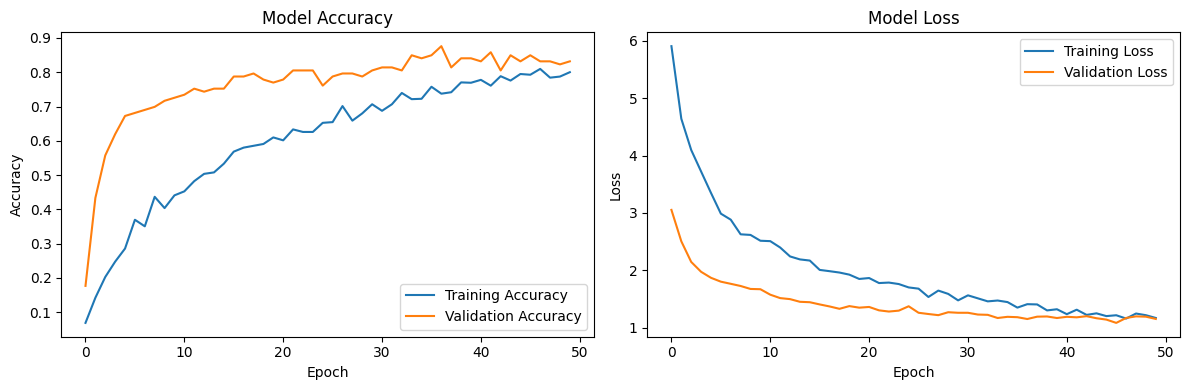

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.8713 - loss: 1.0652
Test Loss (Sebelum Fine-Tuning): 1.1508
Test Accuracy (Sebelum Fine-Tuning): 0.83
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8231 - loss: 1.1965
Test Loss (Sebelum Fine-Tuning): 1.2736
Test Accuracy (Sebelum Fine-Tuning): 0.79


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###64

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0412 - loss: 6.6491 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 445s 16s/step - accuracy: 0.0419 - loss: 6.6235 - val_accuracy: 0.2035 - val_loss: 3.2978
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 622ms/step - accuracy: 0.1059 - loss: 5.2454 - val_accuracy: 0.2920 - val_loss: 2.8446
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 769ms/step - accuracy: 0.1642 - loss: 4.3078 - val_accuracy: 0.3894 - val_loss: 2.5603
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 687ms/step - accuracy: 0.2019 - loss: 3.9316 - val_accuracy: 0.4779 - val_loss: 2.3304
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 731ms/step - accuracy: 0.2607 - loss: 3.5686 - val_accuracy: 0.5310 - val_loss: 2.1567
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 783ms/step - accuracy: 0.2986 - loss: 3.3919 - val_accuracy: 0.5664 - val_loss: 2.0278
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 630ms/step - accuracy: 0.3423 - loss: 3.1274 - val_accuracy: 0.6018 - val_loss: 1.9635
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 738ms/step - accuracy: 0.3495 - loss: 3.1355 - val_accuracy: 0.6283

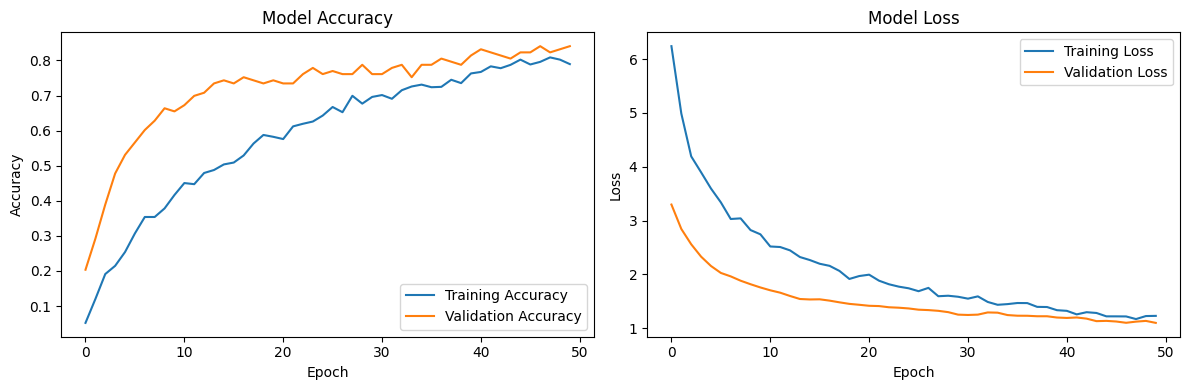

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step - accuracy: 0.8469 - loss: 1.0758
Test Loss (Sebelum Fine-Tuning): 1.1000
Test Accuracy (Sebelum Fine-Tuning): 0.84
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step - accuracy: 0.8147 - loss: 1.2250
Test Loss (Sebelum Fine-Tuning): 1.1983
Test Accuracy (Sebelum Fine-Tuning): 0.82


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Tuning Layer Terakhir

###Membuka 5 Layer terakhir

In [ ]:
for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 845ms/step - accuracy: 0.1139 - loss: 5.3162 - val_accuracy: 0.3274 - val_loss: 4.9689
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 533ms/step - accuracy: 0.3310 - loss: 3.3279 - val_accuracy: 0.4248 - val_loss: 4.5465
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 674ms/step - accuracy: 0.4401 - loss: 2.7031 - val_accuracy: 0.4867 - val_loss: 4.2544
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 524ms/step - accuracy: 0.4978 - loss: 2.3463 - val_accuracy: 0.5310 - val_loss: 3.5847
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 654ms/step - accuracy: 0.5693 - loss: 2.0648 - val_accuracy: 0.5664 - val_loss: 3.9361
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - accuracy: 0.6048 - loss: 1.9332 - val_accuracy: 0.5752 - val_loss: 4.0705
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 516ms/step - accuracy: 0.6839 - loss: 1.6646 - val_accuracy: 0.6195 - val_loss: 3.2267
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 493ms/step - accuracy: 0.6727 - loss: 1.7901 - val_accu

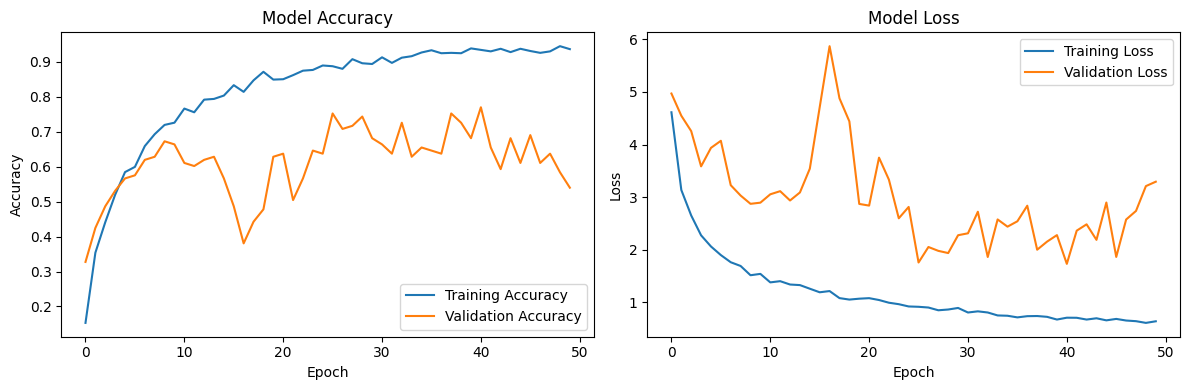

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - accuracy: 0.6034 - loss: 2.8874
Test Loss (Sebelum Fine-Tuning): 3.2933
Test Accuracy (Sebelum Fine-Tuning): 0.54
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 616ms/step - accuracy: 0.6271 - loss: 2.4816
Test Loss (Sebelum Fine-Tuning): 2.9282
Test Accuracy (Sebelum Fine-Tuning): 0.60


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 10 Layer terakhir

In [ ]:
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0810 - loss: 5.8387 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 789s 20s/step - accuracy: 0.0818 - loss: 5.8289 - val_accuracy: 0.1770 - val_loss: 5.0502
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 509ms/step - accuracy: 0.1573 - loss: 4.4620 - val_accuracy: 0.1681 - val_loss: 8.1278
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.2297 - loss: 3.8604 - val_accuracy: 0.1858 - val_loss: 9.2892
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.3110 - loss: 3.4978 - val_accuracy: 0.1504 - val_loss: 10.1943
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 493ms/step - accuracy: 0.3909 - loss: 3.1086 - val_accuracy: 0.2124 - val_loss: 8.0417
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 505ms/step - accuracy: 0.4224 - loss: 2.8105 - val_accuracy: 0.2124 - val_loss: 7.3616
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 485ms/step - accuracy: 0.4203 - loss: 2.6239 - val_accuracy: 0.1770 - val_loss: 8.1815
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 488ms/step - accuracy: 0.4675 - loss: 2.4274 - val_accuracy: 0.221

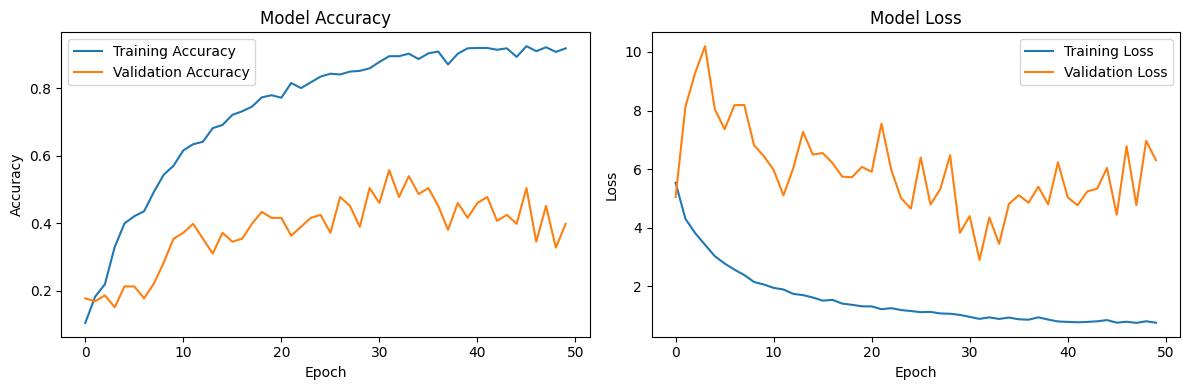

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.4364 - loss: 5.5026
Test Loss (Sebelum Fine-Tuning): 6.3046
Test Accuracy (Sebelum Fine-Tuning): 0.40
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 14s/step - accuracy: 0.4549 - loss: 5.8442
Test Loss (Sebelum Fine-Tuning): 6.4191
Test Accuracy (Sebelum Fine-Tuning): 0.42


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 20 Layer terakhir

In [ ]:
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0875 - loss: 5.8032 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 412s 10s/step - accuracy: 0.0878 - loss: 5.7910 - val_accuracy: 0.1770 - val_loss: 4.9747
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 508ms/step - accuracy: 0.1691 - loss: 4.2302 - val_accuracy: 0.2832 - val_loss: 7.0738
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.2373 - loss: 3.5989 - val_accuracy: 0.3097 - val_loss: 7.1514
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 515ms/step - accuracy: 0.3320 - loss: 3.1914 - val_accuracy: 0.3009 - val_loss: 6.8336
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 502ms/step - accuracy: 0.3689 - loss: 2.8931 - val_accuracy: 0.3540 - val_loss: 6.0428
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.4454 - loss: 2.7016 - val_accuracy: 0.4248 - val_loss: 4.4110
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.5003 - loss: 2.4162 - val_accuracy: 0.5487 - val_loss: 3.2903
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - accuracy: 0.5023 - loss: 2.3824 - val_accuracy: 0.6106

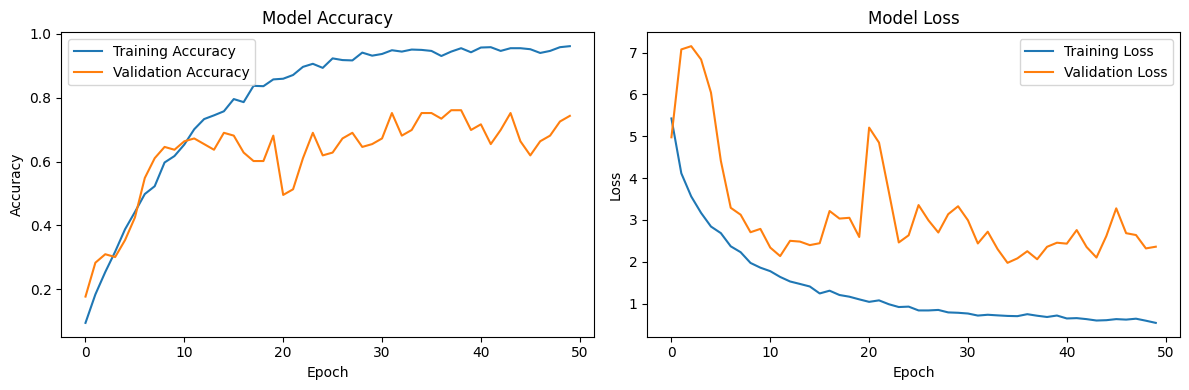

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7619 - loss: 2.3190
Test Loss (Sebelum Fine-Tuning): 2.3611
Test Accuracy (Sebelum Fine-Tuning): 0.74
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.7415 - loss: 2.1253
Test Loss (Sebelum Fine-Tuning): 2.3671
Test Accuracy (Sebelum Fine-Tuning): 0.71


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 30 Layer terakhir

In [ ]:
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 878ms/step - accuracy: 0.0709 - loss: 5.7899 - val_accuracy: 0.2478 - val_loss: 3.8746
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 501ms/step - accuracy: 0.1876 - loss: 4.2176 - val_accuracy: 0.3363 - val_loss: 4.5431
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 503ms/step - accuracy: 0.2387 - loss: 3.6193 - val_accuracy: 0.3717 - val_loss: 4.5660
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 508ms/step - accuracy: 0.3568 - loss: 2.9053 - val_accuracy: 0.3363 - val_loss: 6.4061
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step - accuracy: 0.3767 - loss: 2.9299 - val_accuracy: 0.3717 - val_loss: 5.0559
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 499ms/step - accuracy: 0.4304 - loss: 2.5793 - val_accuracy: 0.4071 - val_loss: 4.2428
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 493ms/step - accuracy: 0.5325 - loss: 2.2766 - val_accuracy: 0.3894 - val_loss: 3.9455
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 494ms/step - accuracy: 0.5834 - loss: 2.1018 - val_accu

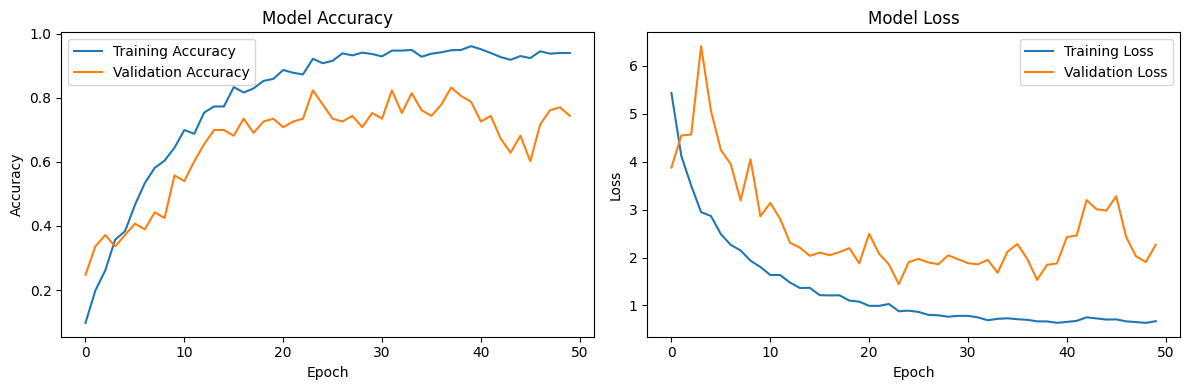

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.7942 - loss: 1.8081
Test Loss (Sebelum Fine-Tuning): 2.2665
Test Accuracy (Sebelum Fine-Tuning): 0.74
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.7736 - loss: 1.7384
Test Loss (Sebelum Fine-Tuning): 1.9822
Test Accuracy (Sebelum Fine-Tuning): 0.75


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 38 Layer terakhir

In [ ]:
for layer in base_model.layers[:-38]:
    layer.trainable = False
for layer in base_model.layers[-38:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 908ms/step - accuracy: 0.1475 - loss: 5.1939 - val_accuracy: 0.1770 - val_loss: 9.3512
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 528ms/step - accuracy: 0.3543 - loss: 3.2985 - val_accuracy: 0.1593 - val_loss: 8.1506
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.4853 - loss: 2.5324 - val_accuracy: 0.3274 - val_loss: 4.7054
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.5835 - loss: 2.1166 - val_accuracy: 0.2655 - val_loss: 4.5315
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 509ms/step - accuracy: 0.6600 - loss: 1.7822 - val_accuracy: 0.3274 - val_loss: 4.6914
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 485ms/step - accuracy: 0.7184 - loss: 1.5989 - val_accuracy: 0.3894 - val_loss: 6.0005
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.7347 - loss: 1.5390 - val_accuracy: 0.3805 - val_loss: 5.5206
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 519ms/step - accuracy: 0.7771 - loss: 1.3780 - val_accu

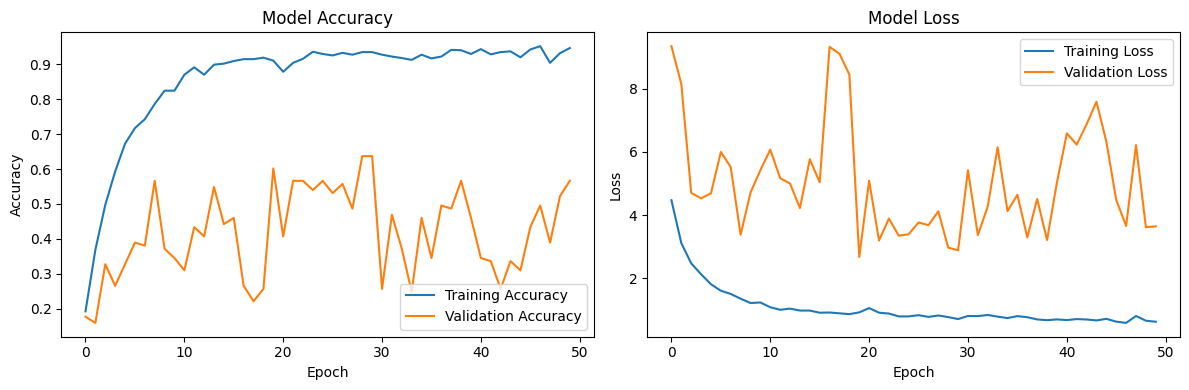

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.5547 - loss: 3.7157
Test Loss (Sebelum Fine-Tuning): 3.6434
Test Accuracy (Sebelum Fine-Tuning): 0.57
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 654ms/step - accuracy: 0.5042 - loss: 3.6255
Test Loss (Sebelum Fine-Tuning): 4.0075
Test Accuracy (Sebelum Fine-Tuning): 0.50


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 40 Layer terakhir

In [ ]:
for layer in base_model.layers[:-40]:
    layer.trainable = False
for layer in base_model.layers[-40:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 910ms/step - accuracy: 0.1698 - loss: 4.9216 - val_accuracy: 0.3097 - val_loss: 6.1007
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 485ms/step - accuracy: 0.5029 - loss: 2.4094 - val_accuracy: 0.2743 - val_loss: 5.6083
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 499ms/step - accuracy: 0.7280 - loss: 1.4683 - val_accuracy: 0.3805 - val_loss: 5.4809
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.7839 - loss: 1.3460 - val_accuracy: 0.5133 - val_loss: 3.7971
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 499ms/step - accuracy: 0.8619 - loss: 1.1609 - val_accuracy: 0.4513 - val_loss: 4.0340
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 500ms/step - accuracy: 0.8414 - loss: 1.1427 - val_accuracy: 0.5133 - val_loss: 3.0816
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 492ms/step - accuracy: 0.8761 - loss: 1.0288 - val_accuracy: 0.4159 - val_loss: 5.3623
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - accuracy: 0.9009 - loss: 1.0378 - val_accu

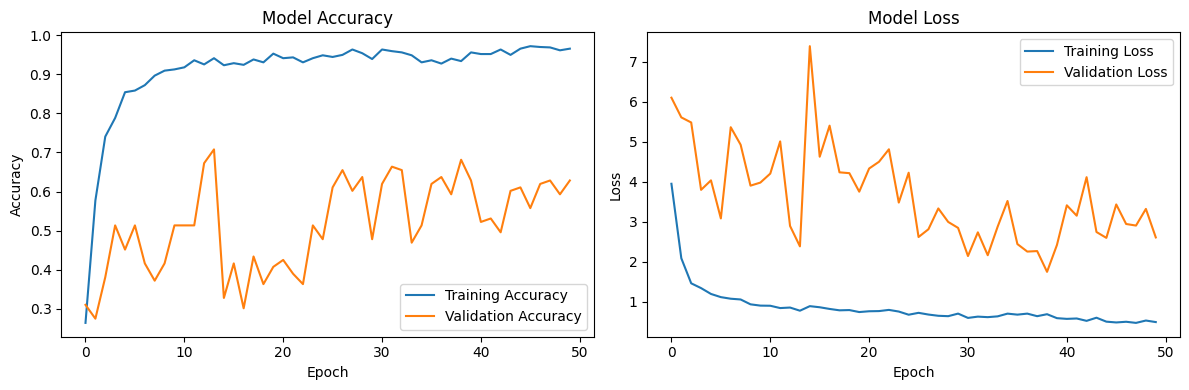

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.6784 - loss: 2.3492
Test Loss (Sebelum Fine-Tuning): 2.6073
Test Accuracy (Sebelum Fine-Tuning): 0.63
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 883ms/step - accuracy: 0.6844 - loss: 2.2759
Test Loss (Sebelum Fine-Tuning): 2.2842
Test Accuracy (Sebelum Fine-Tuning): 0.67


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###Membuka 50 Layer terakhir

In [ ]:
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 981ms/step - accuracy: 0.1138 - loss: 5.0770 - val_accuracy: 0.2566 - val_loss: 4.1294
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 536ms/step - accuracy: 0.3289 - loss: 3.3237 - val_accuracy: 0.2478 - val_loss: 6.4920
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 521ms/step - accuracy: 0.5024 - loss: 2.5974 - val_accuracy: 0.4602 - val_loss: 4.8910
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 505ms/step - accuracy: 0.5967 - loss: 2.1435 - val_accuracy: 0.4336 - val_loss: 4.5676
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 492ms/step - accuracy: 0.7120 - loss: 1.7536 - val_accuracy: 0.4248 - val_loss: 4.6119
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 523ms/step - accuracy: 0.7346 - loss: 1.6430 - val_accuracy: 0.4513 - val_loss: 4.4209
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 547ms/step - accuracy: 0.7536 - loss: 1.5255 - val_accuracy: 0.4956 - val_loss: 3.9415
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 502ms/step - accuracy: 0.7953 - loss: 1.4090 - val_accu

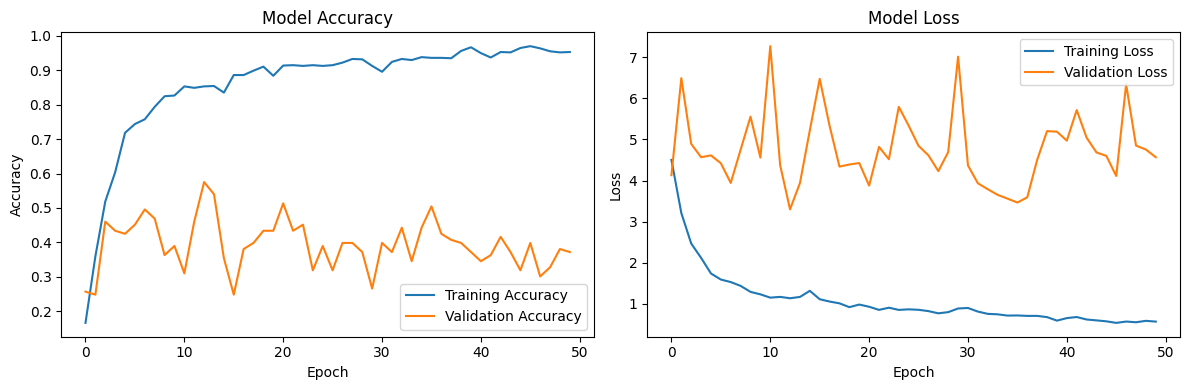

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.4310 - loss: 4.1473
Test Loss (Sebelum Fine-Tuning): 4.5676
Test Accuracy (Sebelum Fine-Tuning): 0.37
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 670ms/step - accuracy: 0.4155 - loss: 4.6972
Test Loss (Sebelum Fine-Tuning): 5.0779
Test Accuracy (Sebelum Fine-Tuning): 0.38


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Epoch

###30

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator,
    )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/30 ━━━━━━━━━━━━━━━━━━━━ 11s 12s/step - accuracy: 0.2300 - loss: 3.3681

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 511s 14s/step - accuracy: 0.2403 - loss: 3.3294 - val_accuracy: 0.5398 - val_loss: 2.2469
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 540ms/step - accuracy: 0.7677 - loss: 1.4931 - val_accuracy: 0.6195 - val_loss: 1.8748
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 527ms/step - accuracy: 0.8480 - loss: 1.1733 - val_accuracy: 0.6903 - val_loss: 1.6466
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 537ms/step - accuracy: 0.9130 - loss: 0.9783 - val_accuracy: 0.7611 - val_loss: 1.4480
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 536ms/step - accuracy: 0.9390 - loss: 0.8805 - val_accuracy: 0.7876 - val_loss: 1.3334
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 539ms/step - accuracy: 0.9651 - loss: 0.8070 - val_accuracy: 0.8230 - val_loss: 1.2803
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.9538 - loss: 0.7739 - val_accuracy: 0.7965 - val_loss: 1.3156
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 545ms/step - accuracy: 0.9656 - loss: 0.7199 - val_accuracy: 0.7876

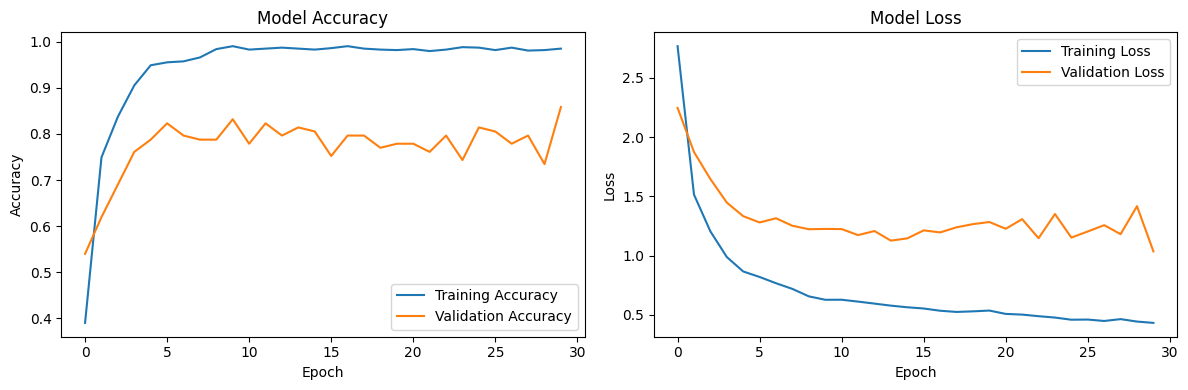

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.8579 - loss: 0.9874
Test Loss (Sebelum Fine-Tuning): 1.0359
Test Accuracy (Sebelum Fine-Tuning): 0.86
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 0.6783 - loss: 1.3708
Test Loss (Sebelum Fine-Tuning): 1.3843
Test Accuracy (Sebelum Fine-Tuning): 0.72


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###50

###100

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
    )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/30 ━━━━━━━━━━━━━━━━━━━━ 10s 11s/step - accuracy: 0.2268 - loss: 3.5623

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 522s 13s/step - accuracy: 0.2369 - loss: 3.5176 - val_accuracy: 0.5664 - val_loss: 2.1628
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 68s 536ms/step - accuracy: 0.7533 - loss: 1.5941 - val_accuracy: 0.6549 - val_loss: 1.8092
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 544ms/step - accuracy: 0.8665 - loss: 1.1647 - val_accuracy: 0.6991 - val_loss: 1.5582
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 543ms/step - accuracy: 0.9139 - loss: 0.9952 - val_accuracy: 0.7611 - val_loss: 1.4527
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 554ms/step - accuracy: 0.9186 - loss: 0.9422 - val_accuracy: 0.7611 - val_loss: 1.4077
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 554ms/step - accuracy: 0.9493 - loss: 0.7937 - val_accuracy: 0.7611 - val_loss: 1.3623
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 546ms/step - accuracy: 0.9584 - loss: 0.7678 - val_accuracy: 0.7876 - val_loss: 1.2992
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 531ms/step - accuracy: 0.9667 - loss: 0.7060 - val_accuracy:

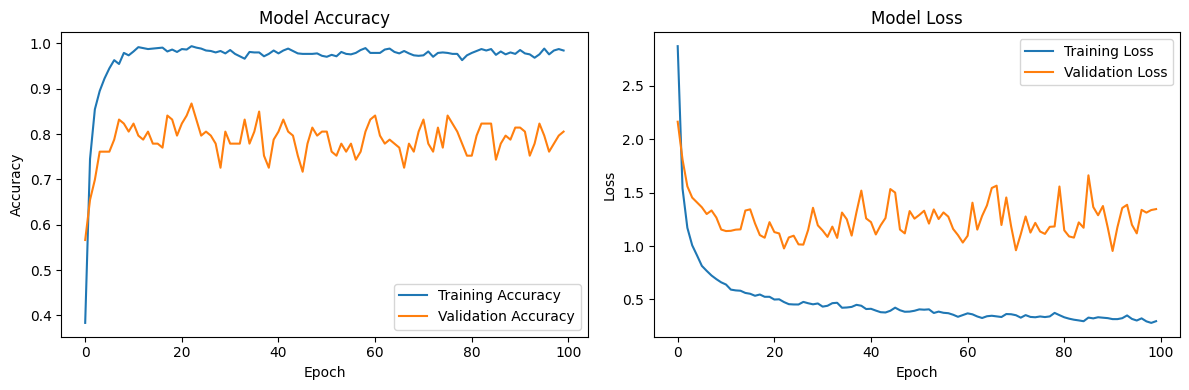

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8263 - loss: 1.2240
Test Loss (Sebelum Fine-Tuning): 1.3454
Test Accuracy (Sebelum Fine-Tuning): 0.81
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.8287 - loss: 1.2109
Test Loss (Sebelum Fine-Tuning): 1.3558
Test Accuracy (Sebelum Fine-Tuning): 0.80


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###150

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=150,
        validation_data=validation_generator,
    )

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 795ms/step - accuracy: 0.2654 - loss: 3.2134 - val_accuracy: 0.5929 - val_loss: 2.0587
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 534ms/step - accuracy: 0.7526 - loss: 1.5238 - val_accuracy: 0.6814 - val_loss: 1.6775
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 531ms/step - accuracy: 0.8357 - loss: 1.2436 - val_accuracy: 0.7434 - val_loss: 1.5603
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - accuracy: 0.8848 - loss: 1.0483 - val_accuracy: 0.7257 - val_loss: 1.4817
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.9423 - loss: 0.8786 - val_accuracy: 0.7965 - val_loss: 1.3918
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 544ms/step - accuracy: 0.9554 - loss: 0.8176 - val_accuracy: 0.7611 - val_loss: 1.3039
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 529ms/step - accuracy: 0.9590 - loss: 0.7857 - val_accuracy: 0.8142 - val_loss: 1.2446
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 532ms/step - accuracy: 0.9820 - loss: 0.7113 - 

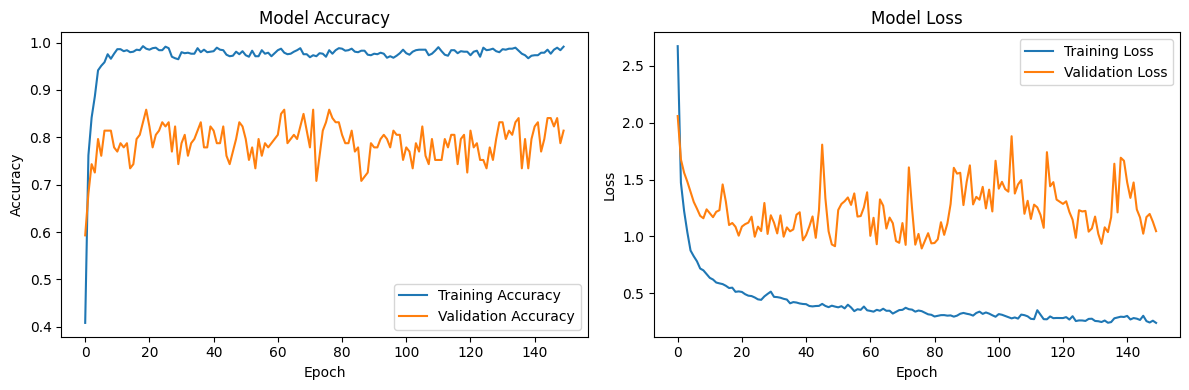

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.8215 - loss: 0.9577
Test Loss (Sebelum Fine-Tuning): 1.0466
Test Accuracy (Sebelum Fine-Tuning): 0.81
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - accuracy: 0.7601 - loss: 1.0892
Test Loss (Sebelum Fine-Tuning): 1.1557
Test Accuracy (Sebelum Fine-Tuning): 0.75


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###200

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=200,
        validation_data=validation_generator,
    )

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 760ms/step - accuracy: 0.2312 - loss: 3.3340 - val_accuracy: 0.5929 - val_loss: 2.1553
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 514ms/step - accuracy: 0.7392 - loss: 1.5951 - val_accuracy: 0.6726 - val_loss: 1.7394
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 519ms/step - accuracy: 0.8339 - loss: 1.2453 - val_accuracy: 0.6991 - val_loss: 1.5554
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - accuracy: 0.9064 - loss: 1.0304 - val_accuracy: 0.7699 - val_loss: 1.4464
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 503ms/step - accuracy: 0.9273 - loss: 0.8899 - val_accuracy: 0.8142 - val_loss: 1.3345
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 528ms/step - accuracy: 0.9712 - loss: 0.7710 - val_accuracy: 0.8230 - val_loss: 1.2545
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 525ms/step - accuracy: 0.9785 - loss: 0.7457 - val_accuracy: 0.7965 - val_loss: 1.2356
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 510ms/step - accuracy: 0.9873 - loss: 0.6891 - 

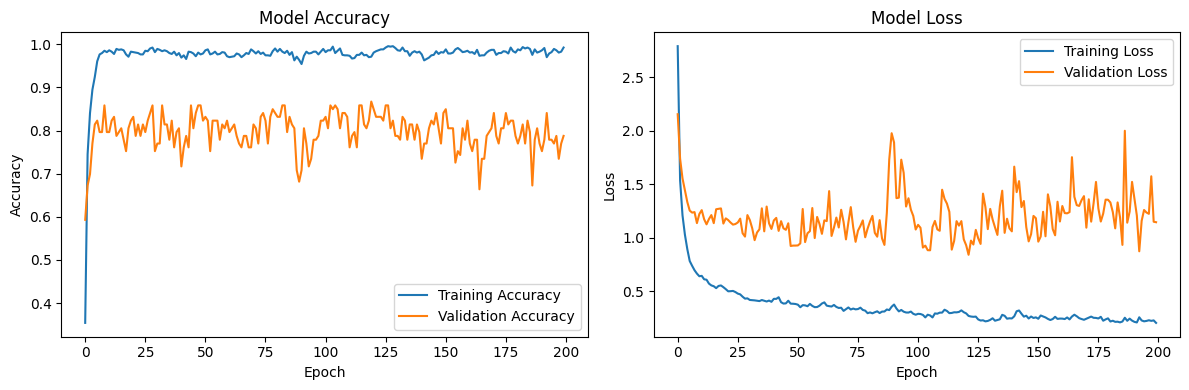

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8369 - loss: 0.9711
Test Loss (Sebelum Fine-Tuning): 1.1460
Test Accuracy (Sebelum Fine-Tuning): 0.79
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - accuracy: 0.7525 - loss: 1.3133
Test Loss (Sebelum Fine-Tuning): 1.4010
Test Accuracy (Sebelum Fine-Tuning): 0.77


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

###250


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=250,
        validation_data=validation_generator,
    )

Epoch 1/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 746ms/step - accuracy: 0.2478 - loss: 3.2544 - val_accuracy: 0.5752 - val_loss: 2.2463
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 523ms/step - accuracy: 0.7409 - loss: 1.4951 - val_accuracy: 0.6106 - val_loss: 1.9496
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 531ms/step - accuracy: 0.8453 - loss: 1.2112 - val_accuracy: 0.6814 - val_loss: 1.6797
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 539ms/step - accuracy: 0.8924 - loss: 1.0232 - val_accuracy: 0.7168 - val_loss: 1.5429
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step - accuracy: 0.9378 - loss: 0.8783 - val_accuracy: 0.7257 - val_loss: 1.4016
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.9643 - loss: 0.7892 - val_accuracy: 0.7699 - val_loss: 1.3406
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 534ms/step - accuracy: 0.9711 - loss: 0.7356 - val_accuracy: 0.7522 - val_loss: 1.3919
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 549ms/step - accuracy: 0.9758 - loss: 0.7121 - 

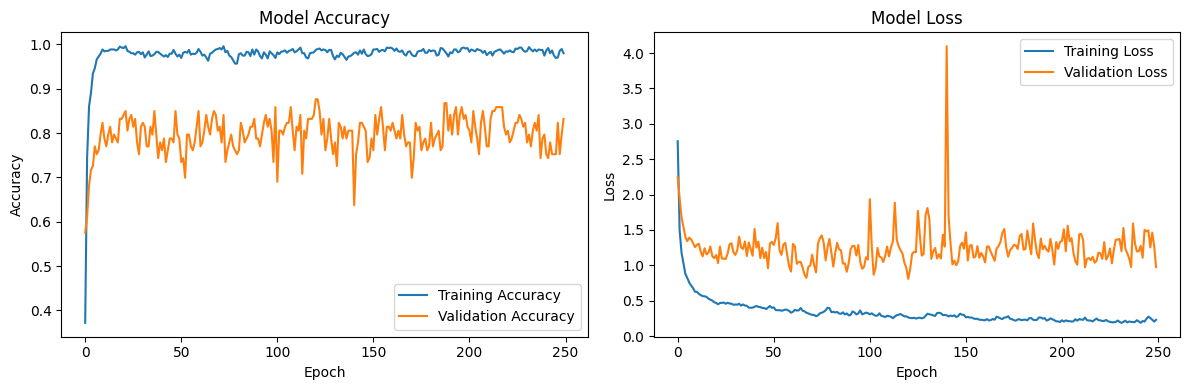

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8380 - loss: 0.9081
Test Loss (Sebelum Fine-Tuning): 0.9748
Test Accuracy (Sebelum Fine-Tuning): 0.83
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 899ms/step - accuracy: 0.8190 - loss: 0.9782
Test Loss (Sebelum Fine-Tuning): 1.0450
Test Accuracy (Sebelum Fine-Tuning): 0.82


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

#Kombinasi Hyperparrameter

##Best Model

In [ ]:
for layer in base_model.layers[:-38]:
    layer.trainable = False
for layer in base_model.layers[-38:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=250,
        validation_data=validation_generator,
    )

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/30 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.0538 - loss: 6.2420

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 544s 14s/step - accuracy: 0.0538 - loss: 6.2541 - val_accuracy: 0.0619 - val_loss: 3.6731
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 576ms/step - accuracy: 0.1063 - loss: 5.7484 - val_accuracy: 0.0796 - val_loss: 3.5954
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 609ms/step - accuracy: 0.0977 - loss: 5.5529 - val_accuracy: 0.1150 - val_loss: 3.4965
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 592ms/step - accuracy: 0.1138 - loss: 5.3474 - val_accuracy: 0.1062 - val_loss: 3.4036
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 602ms/step - accuracy: 0.1324 - loss: 4.9373 - val_accuracy: 0.1947 - val_loss: 3.2629
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 594ms/step - accuracy: 0.1686 - loss: 4.4779 - val_accuracy: 0.2655 - val_loss: 3.0997
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 565ms/step - accuracy: 0.1818 - loss: 4.4243 - val_accuracy: 0.3009 - val_loss: 3.0158
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 589ms/step - accuracy: 0.2058 - loss: 4.2882 - val_accuracy:

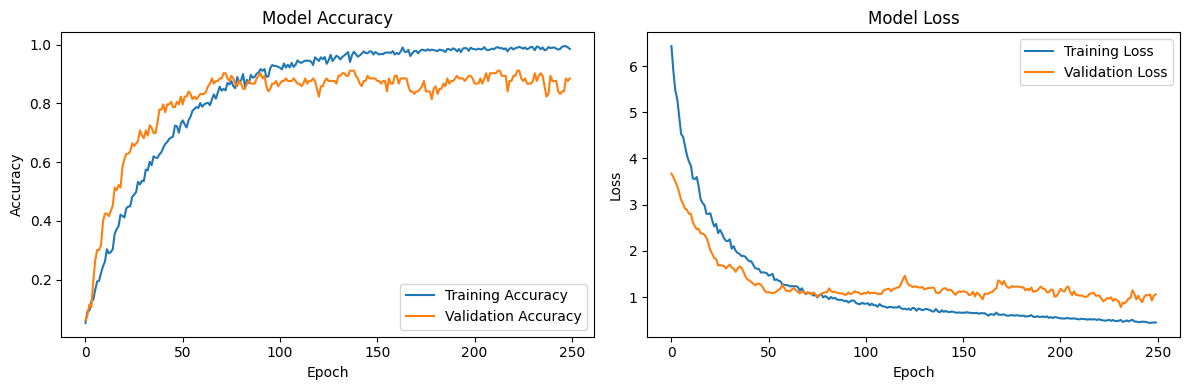

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.8884 - loss: 1.0418
Test Loss (Sebelum Fine-Tuning): 1.0613
Test Accuracy (Sebelum Fine-Tuning): 0.88
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.9097 - loss: 0.8514
Test Loss (Sebelum Fine-Tuning): 0.8549
Test Accuracy (Sebelum Fine-Tuning): 0.91


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


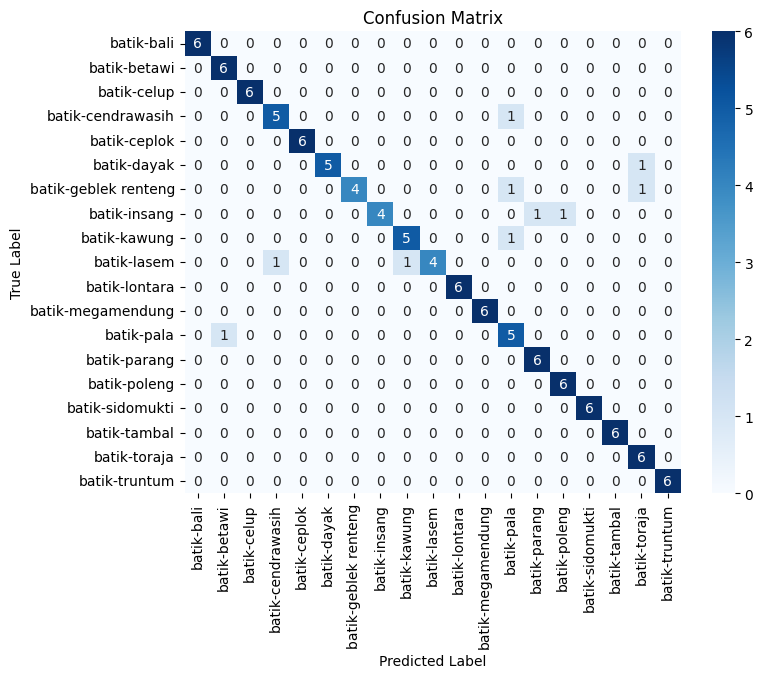

Classification Report:
                      precision    recall  f1-score   support

          batik-bali       1.00      1.00      1.00         6
        batik-betawi       0.86      1.00      0.92         6
         batik-celup       1.00      1.00      1.00         6
   batik-cendrawasih       0.83      0.83      0.83         6
        batik-ceplok       1.00      1.00      1.00         6
         batik-dayak       1.00      0.83      0.91         6
batik-geblek renteng       1.00      0.67      0.80         6
        batik-insang       1.00      0.67      0.80         6
        batik-kawung       0.83      0.83      0.83         6
         batik-lasem       1.00      0.67      0.80         6
       batik-lontara       1.00      1.00      1.00         6
   batik-megamendung       1.00      1.00      1.00         6
          batik-pala       0.62      0.83      0.71         6
        batik-parang       0.86      1.00      0.92         6
        batik-poleng       0.86      1.00     

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
import numpy as np

# Prediksi pada data pengujian
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Menghitung Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot Confusion Matrix menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Laporan Klasifikasi (F1-Score, Precision, Recall)
print('Classification Report:')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Menghitung F1-Score, Precision, dan Recall secara keseluruhan (macro average)
f1 = f1_score(test_generator.classes, y_pred, average='macro')
recall = recall_score(test_generator.classes, y_pred, average='macro')
precision = precision_score(test_generator.classes, y_pred, average='macro')

print(f'Overall F1-Score: {f1:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall Precision: {precision:.2f}')

In [ ]:
# Menyimpan model dalam format .keras
model.save('Tabulasi1_74%.keras')
print("Model telah disimpan sebagai '/content/drive/MyDrive/SKRIPSI FIRMAN/Tabulasi1 90%_2.keras'")

Model telah disimpan sebagai '/content/drive/MyDrive/SKRIPSI FIRMAN/Tabulasi1 90%_2.keras'


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import io
from google.colab import files  # Ini untuk Google Colab

# Memuat model yang sudah dilatih
model_path = "/content/drive/MyDrive/Firman/model_91%.keras"
model = load_model(model_path)

# Daftar kelas (sesuaikan dengan kelas yang Anda miliki)
class_names = [
    'batik-bali', 'batik-betawi', 'batik-celup', 'batik-cendrawasih', 'batik-ceplok',
    'batik-dayak', 'batik-geblek renteng', 'batik-insang', 'batik-kawung', 'batik-lasem',
    'batik-lontara', 'batik-megamendung', 'batik-pala', 'batik-parang', 'batik-poleng',
    'batik-sidomukti', 'batik-tambal', 'batik-toraja', 'batik-truntum'
]

# Fungsi untuk memprediksi kelas gambar
def predict_image(image):
    img = image.resize((224, 224))  # Resize gambar sesuai input model
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = predictions[0][predicted_index]
    return predicted_class, confidence

# Fungsi untuk mengunggah dan menampilkan prediksi
def upload_and_predict():
    uploaded = files.upload()
    for fn in uploaded.keys():
        # Membaca file gambar
        img = Image.open(io.BytesIO(uploaded[fn]))

        # Menampilkan UI dengan gambar dan prediksi
        display_prediction_ui(img)

# Fungsi untuk menampilkan hasil prediksi dengan widget
def display_prediction_ui(image):
    # Bersihkan output sebelumnya
    clear_output()

    # Membuat widget untuk menampilkan gambar
    image_widget = widgets.Image(value=image_to_bytes(image), format='png', width=220, height=220)

    # Prediksi dan confidence
    predicted_class, confidence = predict_image(image)

    # Membuat label prediksi dengan gaya
    prediction_text = widgets.HTML(
        value=f"<h3 style='color: #ffffff; text-align: center;'>Prediksi Kelas: <b>{predicted_class}</b></h3>"
              f"<h4 style='text-align: center; color: #ffffff;'>Confidence: {confidence:.2f}</h4>",
        layout=widgets.Layout(margin='10px')
    )

    # Menambahkan judul dan tata letak
    title = widgets.HTML(
        value="<h2 style='text-align: center; color: #ffffff;'>Klasifikasi Gambar Batik</h2>",
        layout=widgets.Layout(margin='20px 0')
    )

    description = widgets.HTML(
        value="<p style='text-align: center; color: #ffffff;'>Unggah gambar batik untuk memprediksi kelas dan melihat tingkat kepercayaan model.</p>",
        layout=widgets.Layout(margin='10px 0')
    )

    # Kotak layout untuk gambar dan prediksi
    image_display_box = widgets.VBox([image_widget, prediction_text], layout=widgets.Layout(
        border='2px solid #ffffff', padding='15px', width='270px', align_items='center', background_color='#ffffff', margin='auto'))

    # Menampilkan UI secara keseluruhan dengan tata letak sentral dan latar belakang putih
    ui_layout = widgets.VBox([title, description, image_display_box, upload_button], layout=widgets.Layout(
        align_items='center', padding='10px', background_color='#ffffff', border='3px solid #ffffff', width='320px', margin='auto'))

    display(ui_layout)

# Fungsi untuk konversi gambar ke bytes
def image_to_bytes(img):
    with io.BytesIO() as output:
        img.save(output, format="PNG")
        return output.getvalue()

# Tombol untuk memulai proses unggah dan prediksi
upload_button = widgets.Button(
    description="Unggah Gambar Batik",
    button_style='primary',  # Warna tombol biru
    icon='upload',
    layout=widgets.Layout(width='200px', margin='10px auto')
)
upload_button.on_click(lambda x: upload_and_predict())

# Menampilkan tombol di UI
display(upload_button)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


##Percobaan Pertama

In [ ]:
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
    )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/59 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0625 - loss: 6.6502 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 333s 5s/step - accuracy: 0.0625 - loss: 6.6450 - val_accuracy: 0.0796 - val_loss: 3.6438
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 371ms/step - accuracy: 0.0602 - loss: 5.9375 - val_accuracy: 0.1150 - val_loss: 3.4855
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 378ms/step - accuracy: 0.0686 - loss: 5.5931 - val_accuracy: 0.1593 - val_loss: 3.3769
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 42s 388ms/step - accuracy: 0.0952 - loss: 5.7788 - val_accuracy: 0.2743 - val_loss: 3.0945
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 365ms/step - accuracy: 0.1117 - loss: 5.3211 - val_accuracy: 0.2655 - val_loss: 2.9429
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 377ms/step - accuracy: 0.1011 - loss: 5.2719 - val_accuracy: 0.3186 - val_loss: 2.8507
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 25s 378ms/step - accuracy: 0.1250 - loss: 4.9110 - val_accuracy: 0.3363 - val_loss: 2.8353
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.1293 - loss: 4.9339 - val_accuracy: 

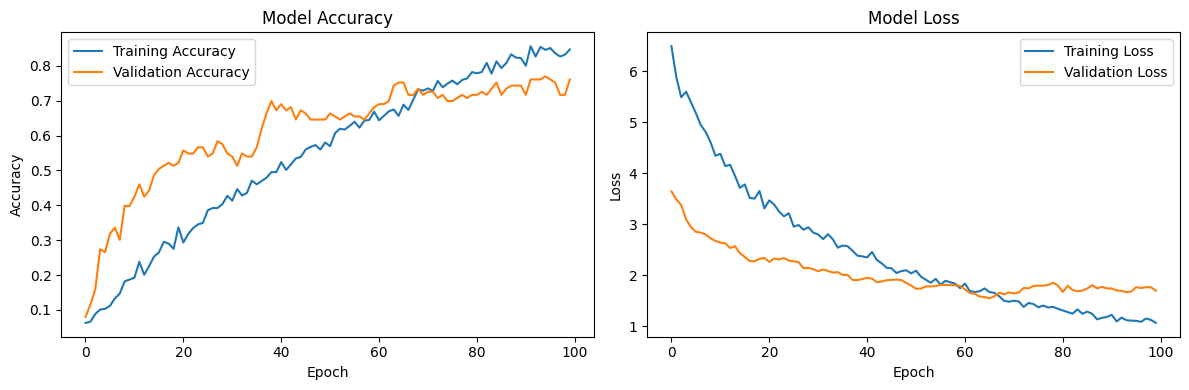

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7835 - loss: 1.5790 
Test Loss (Sebelum Fine-Tuning): 1.6973
Test Accuracy (Sebelum Fine-Tuning): 0.76
8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.7599 - loss: 1.6005
Test Loss (Sebelum Fine-Tuning): 1.7035
Test Accuracy (Sebelum Fine-Tuning): 0.74


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan kedua

In [ ]:
for layer in base_model.layers[:154]:
    layer.trainable = False
for layer in base_model.layers[154:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melakukan fine-tuning
history_fine = model.fit(train_generator,
                         epochs=100,
                         batch_size=64,
                         validation_data=validation_generator)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5361 - loss: 2.3536 - val_accuracy: 0.5664 - val_loss: 2.1410
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 936ms/step - accuracy: 0.5213 - loss: 2.3378 - val_accuracy: 0.5664 - val_loss: 2.1033
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 955ms/step - accuracy: 0.5670 - loss: 2.2833 - val_accuracy: 0.5575 - val_loss: 2.0963
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 911ms/step - accuracy: 0.5798 - loss: 2.2023 - val_accuracy: 0.5575 - val_loss: 2.0769
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 915ms/step - accuracy: 0.6017 - loss: 2.1835 - val_accuracy: 0.5841 - val_loss: 2.0420
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 946ms/step - accuracy: 0.5571 - loss: 2.2029 - val_accuracy: 0.5841 - val_loss: 2.0287
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 913ms/step - accuracy: 0.5503 - loss: 2.2796 - val_accuracy: 0.5841 - val_loss: 2.0180
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 937ms/step - accuracy: 0.5761 - loss: 2.1718 - val

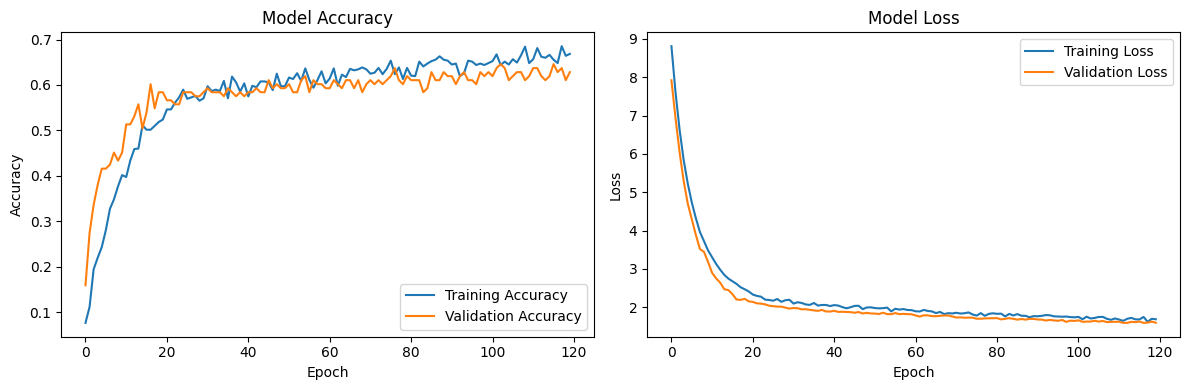

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.6480 - loss: 1.6033
Val Accuracy: 0.63
Val Loss: 1.5976
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - accuracy: 0.6521 - loss: 1.7537
Val Accuracy: 0.66
Val Loss: 1.7232


In [ ]:
combined_accuracy = history.history['accuracy'] + history_fine.history['accuracy']
combined_val_accuracy = history.history['val_accuracy'] + history_fine.history['val_accuracy']
combined_loss = history.history['loss'] + history_fine.history['loss']
combined_val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(combined_accuracy, label='Training Accuracy')
plt.plot(combined_val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(combined_loss, label='Training Loss')
plt.plot(combined_val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Val Accuracy: {val_accuracy:.2f}')
print(f'Val Loss: {val_loss:.4f}')

val_loss, val_accuracy = model.evaluate(test_generator)
print(f'Val Accuracy: {val_accuracy:.2f}')
print(f'Val Loss: {val_loss:.4f}')


##Percobaan ketiga

---

Bukaan layer 20, Learning rate 0.001, epoch 50

In [ ]:
for layer in base_model.layers[:-20]:
    layer.trainable = False
for layer in base_model.layers[-20:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
    )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0875 - loss: 5.8032 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 412s 10s/step - accuracy: 0.0878 - loss: 5.7910 - val_accuracy: 0.1770 - val_loss: 4.9747
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 508ms/step - accuracy: 0.1691 - loss: 4.2302 - val_accuracy: 0.2832 - val_loss: 7.0738
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.2373 - loss: 3.5989 - val_accuracy: 0.3097 - val_loss: 7.1514
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 515ms/step - accuracy: 0.3320 - loss: 3.1914 - val_accuracy: 0.3009 - val_loss: 6.8336
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 502ms/step - accuracy: 0.3689 - loss: 2.8931 - val_accuracy: 0.3540 - val_loss: 6.0428
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 490ms/step - accuracy: 0.4454 - loss: 2.7016 - val_accuracy: 0.4248 - val_loss: 4.4110
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 491ms/step - accuracy: 0.5003 - loss: 2.4162 - val_accuracy: 0.5487 - val_loss: 3.2903
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - accuracy: 0.5023 - loss: 2.3824 - val_accuracy: 0.6106

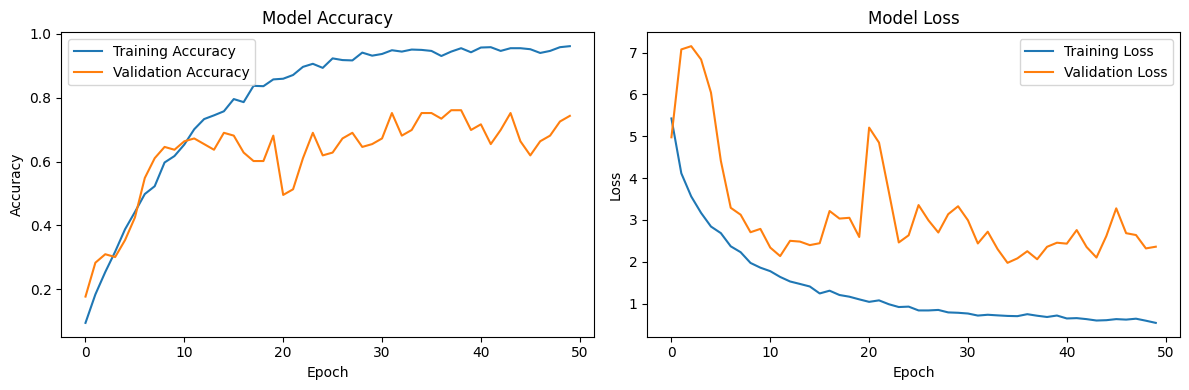

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7619 - loss: 2.3190
Test Loss (Sebelum Fine-Tuning): 2.3611
Test Accuracy (Sebelum Fine-Tuning): 0.74
4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.7415 - loss: 2.1253
Test Loss (Sebelum Fine-Tuning): 2.3671
Test Accuracy (Sebelum Fine-Tuning): 0.71


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan keempat

In [ ]:
for layer in base_model.layers[:-38]:
    layer.trainable = False
for layer in base_model.layers[-38:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=150,
        validation_data=validation_generator,
    )

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.0648 - loss: 6.3441 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 497s 13s/step - accuracy: 0.0644 - loss: 6.3437 - val_accuracy: 0.1062 - val_loss: 3.5798
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 535ms/step - accuracy: 0.0419 - loss: 6.3581 - val_accuracy: 0.1947 - val_loss: 3.4357
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 527ms/step - accuracy: 0.0958 - loss: 5.6301 - val_accuracy: 0.2124 - val_loss: 3.2804
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 511ms/step - accuracy: 0.1134 - loss: 5.4406 - val_accuracy: 0.2301 - val_loss: 3.1618
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 517ms/step - accuracy: 0.1271 - loss: 5.0158 - val_accuracy: 0.2035 - val_loss: 3.0737
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 512ms/step - accuracy: 0.1393 - loss: 4.8062 - val_accuracy: 0.2124 - val_loss: 3.0688
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 532ms/step - accuracy: 0.1767 - loss: 4.6718 - val_accuracy: 0.2655 - val_loss: 3.0239
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 527ms/step - accuracy: 0.1932 - loss: 4.3546 - val_accuracy:

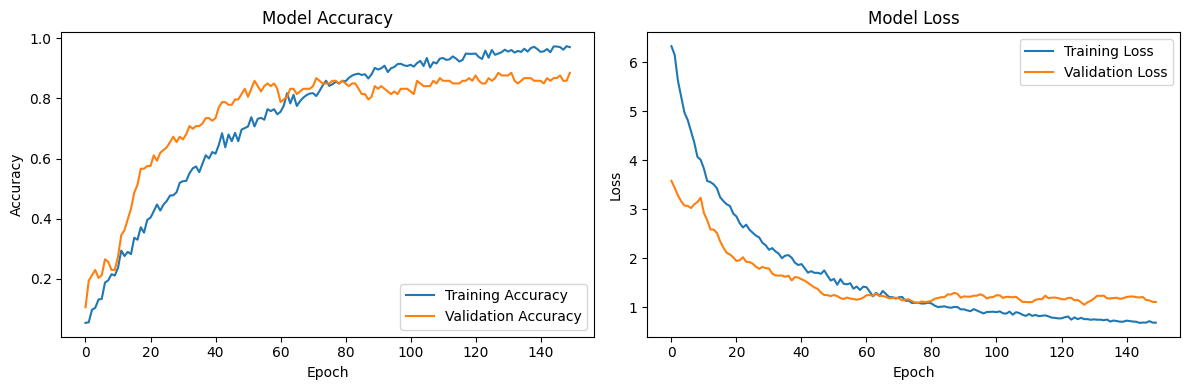

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.9061 - loss: 0.9780
Test Loss (Sebelum Fine-Tuning): 1.1026
Test Accuracy (Sebelum Fine-Tuning): 0.88
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 9s/step - accuracy: 0.8626 - loss: 0.9738
Test Loss (Sebelum Fine-Tuning): 1.0227
Test Accuracy (Sebelum Fine-Tuning): 0.86


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan kelima

In [ ]:
for layer in base_model.layers[:-15]:
    layer.trainable = False
for layer in base_model.layers[-15:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=70,
        validation_data=validation_generator,
    )

Epoch 1/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 972ms/step - accuracy: 0.0655 - loss: 5.9968 - val_accuracy: 0.1239 - val_loss: 4.9029
Epoch 2/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 686ms/step - accuracy: 0.0908 - loss: 5.3262 - val_accuracy: 0.1504 - val_loss: 4.6316
Epoch 3/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 657ms/step - accuracy: 0.1659 - loss: 4.7042 - val_accuracy: 0.1947 - val_loss: 4.6061
Epoch 4/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 695ms/step - accuracy: 0.1807 - loss: 4.2951 - val_accuracy: 0.2920 - val_loss: 4.4764
Epoch 5/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 695ms/step - accuracy: 0.2077 - loss: 4.1464 - val_accuracy: 0.3097 - val_loss: 4.4041
Epoch 6/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 696ms/step - accuracy: 0.2320 - loss: 3.9283 - val_accuracy: 0.3274 - val_loss: 4.3184
Epoch 7/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 689ms/step - accuracy: 0.2366 - loss: 3.7944 - val_accuracy: 0.3540 - val_loss: 4.4148
Epoch 8/70
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 666ms/step - accuracy: 0.3107 - loss: 3.5425 - val_accu

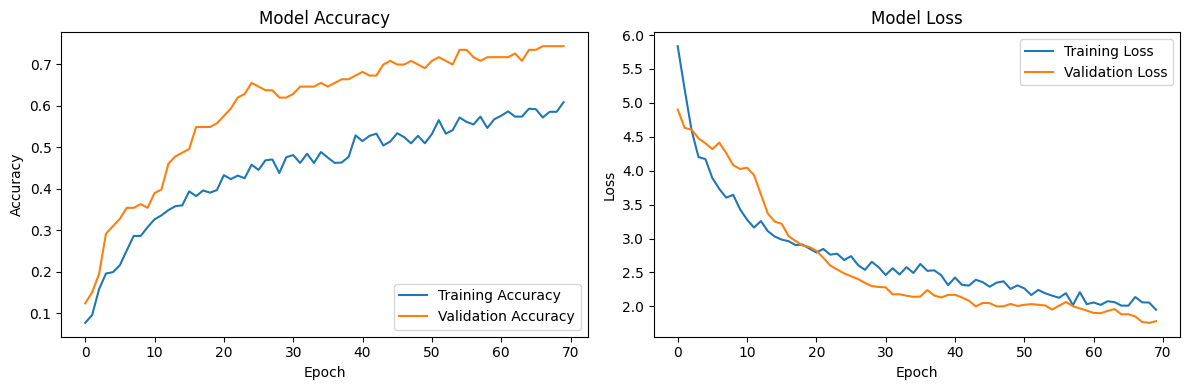

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7661 - loss: 1.6642
Test Loss (Sebelum Fine-Tuning): 1.7815
Test Accuracy (Sebelum Fine-Tuning): 0.74


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 24s 8s/step - accuracy: 0.7235 - loss: 1.5997
Test Loss (Sebelum Fine-Tuning): 1.5322
Test Accuracy (Sebelum Fine-Tuning): 0.73


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan keenam

In [ ]:
model = tf.keras.models.load_model('/content/sample_data/model_batch64_66%.keras')

for layer in base_model.layers[:-5]:
    layer.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melakukan fine-tuning
history2 = model.fit(train_generator,
                         epochs=100,
                         batch_size=64,
                         validation_data=validation_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.6747 - loss: 1.6502 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 762s 31s/step - accuracy: 0.6741 - loss: 1.6512 - val_accuracy: 0.6195 - val_loss: 1.6323
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 943ms/step - accuracy: 0.6534 - loss: 1.7018 - val_accuracy: 0.6283 - val_loss: 1.5929
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 926ms/step - accuracy: 0.6520 - loss: 1.6837 - val_accuracy: 0.6195 - val_loss: 1.5997
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 996ms/step - accuracy: 0.6572 - loss: 1.6730 - val_accuracy: 0.6549 - val_loss: 1.5668
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 921ms/step - accuracy: 0.6486 - loss: 1.7552 - val_accuracy: 0.6372 - val_loss: 1.5651
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 901ms/step - accuracy: 0.6439 - loss: 1.7210 - val_accuracy: 0.6283 - val_loss: 1.5816
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 963ms/step - accuracy: 0.6794 - loss: 1.6363 - val_accuracy: 0.6195 - val_loss: 1.5967
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 983ms/step - accuracy: 0.6677 - loss: 1.6442 - val_accuracy:

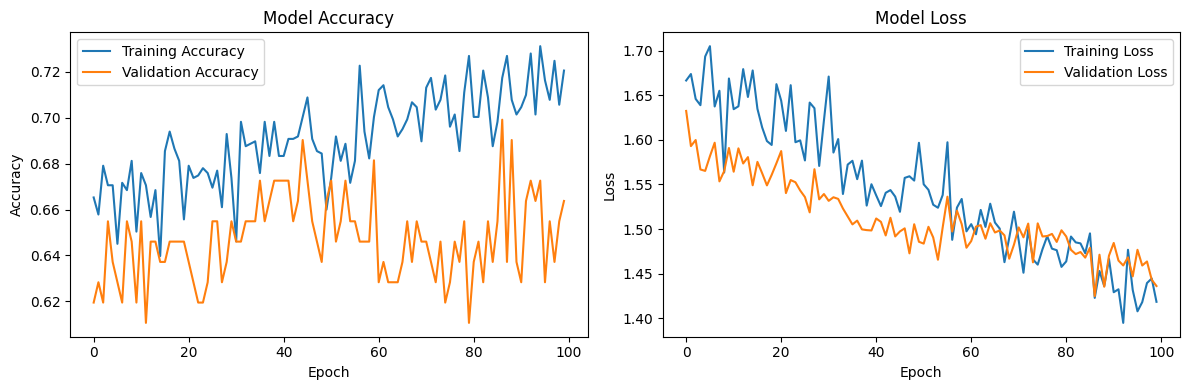

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step - accuracy: 0.6873 - loss: 1.4386
Test Loss (Sebelum Fine-Tuning): 1.4362
Test Accuracy (Sebelum Fine-Tuning): 0.66


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 6s/step - accuracy: 0.6690 - loss: 1.6011
Test Loss (Sebelum Fine-Tuning): 1.5695
Test Accuracy (Sebelum Fine-Tuning): 0.68


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan ketujuh

In [ ]:
from tensorflow.keras.regularizers import l2
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
    )

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 823ms/step - accuracy: 0.0614 - loss: 6.4469 - val_accuracy: 0.0796 - val_loss: 3.7705
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 522ms/step - accuracy: 0.0939 - loss: 5.8019 - val_accuracy: 0.1681 - val_loss: 3.4151
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.0996 - loss: 5.5578 - val_accuracy: 0.2212 - val_loss: 3.1241
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 503ms/step - accuracy: 0.1116 - loss: 5.2907 - val_accuracy: 0.3186 - val_loss: 2.8614
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 478ms/step - accuracy: 0.1433 - loss: 4.9274 - val_accuracy: 0.4248 - val_loss: 2.6562
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 501ms/step - accuracy: 0.1693 - loss: 4.5251 - val_accuracy: 0.4425 - val_loss: 2.4823
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 489ms/step - accuracy: 0.2207 - loss: 4.3129 - val_accuracy: 0.5221 - val_loss: 2.3306
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 504ms/step - accuracy: 0.2176 - loss: 4.2037 - val_accu

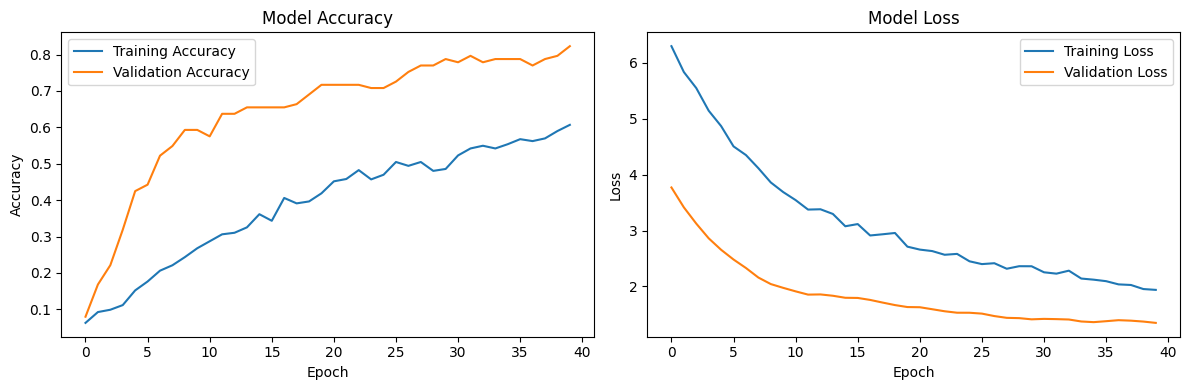

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.8292 - loss: 1.3055
Test Loss (Sebelum Fine-Tuning): 1.3491
Test Accuracy (Sebelum Fine-Tuning): 0.82
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 610ms/step - accuracy: 0.7754 - loss: 1.4656
Test Loss (Sebelum Fine-Tuning): 1.5373
Test Accuracy (Sebelum Fine-Tuning): 0.77


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan kedelapan

In [ ]:
for layer in base_model.layers[:-39]:
    layer.trainable = False
for layer in base_model.layers[-39:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=250,
        validation_data=validation_generator,
    )

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0514 - loss: 6.1258 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 404s 10s/step - accuracy: 0.0515 - loss: 6.1276 - val_accuracy: 0.1327 - val_loss: 3.6385
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 489ms/step - accuracy: 0.0793 - loss: 5.9128 - val_accuracy: 0.1327 - val_loss: 3.4305
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 499ms/step - accuracy: 0.0795 - loss: 5.5130 - val_accuracy: 0.1593 - val_loss: 3.2594
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 502ms/step - accuracy: 0.0863 - loss: 5.3955 - val_accuracy: 0.2566 - val_loss: 3.0572
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 490ms/step - accuracy: 0.1503 - loss: 4.8283 - val_accuracy: 0.2743 - val_loss: 2.9325
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 495ms/step - accuracy: 0.1572 - loss: 4.7210 - val_accuracy: 0.3186 - val_loss: 2.7845
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 513ms/step - accuracy: 0.1811 - loss: 4.2235 - val_accuracy: 0.3717 - val_loss: 2.5933
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.1986 - loss: 4.2416 - val_accuracy:

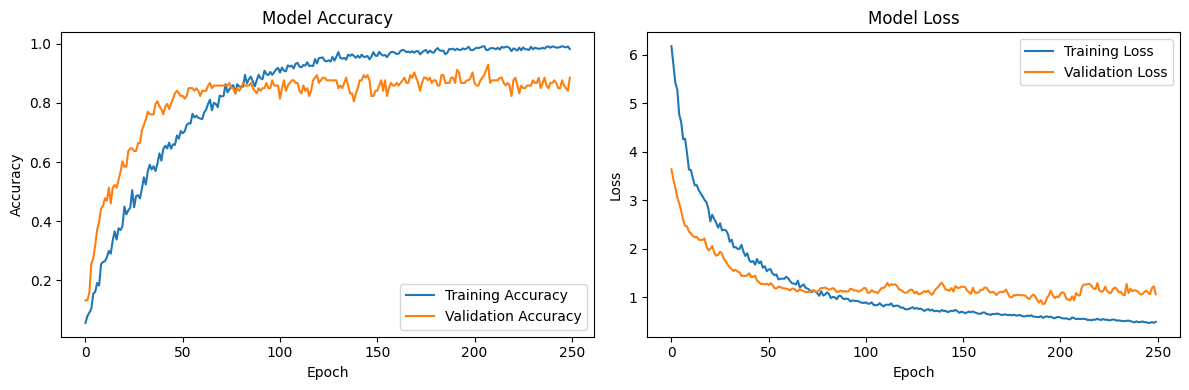

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9040 - loss: 0.9837
Test Loss (Sebelum Fine-Tuning): 1.0604
Test Accuracy (Sebelum Fine-Tuning): 0.88
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.9100 - loss: 0.7853
Test Loss (Sebelum Fine-Tuning): 0.8216
Test Accuracy (Sebelum Fine-Tuning): 0.89


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan kesembilan

In [ ]:
for layer in base_model.layers[:-48]:
    layer.trainable = False
for layer in base_model.layers[-48:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=250,
        validation_data=validation_generator,
    )

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0696 - loss: 6.3473 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 776s 19s/step - accuracy: 0.0691 - loss: 6.3491 - val_accuracy: 0.0708 - val_loss: 3.6627
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 57s 505ms/step - accuracy: 0.0709 - loss: 6.1096 - val_accuracy: 0.0885 - val_loss: 3.5158
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 509ms/step - accuracy: 0.0872 - loss: 5.8569 - val_accuracy: 0.1239 - val_loss: 3.4126
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 519ms/step - accuracy: 0.1161 - loss: 5.4275 - val_accuracy: 0.1062 - val_loss: 3.4052
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 517ms/step - accuracy: 0.1175 - loss: 5.1864 - val_accuracy: 0.1593 - val_loss: 3.3531
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 521ms/step - accuracy: 0.1547 - loss: 5.0403 - val_accuracy: 0.1770 - val_loss: 3.3160
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 516ms/step - accuracy: 0.1530 - loss: 4.6615 - val_accuracy: 0.2389 - val_loss: 3.1569
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.1824 - loss: 4.3050 - val_accuracy:

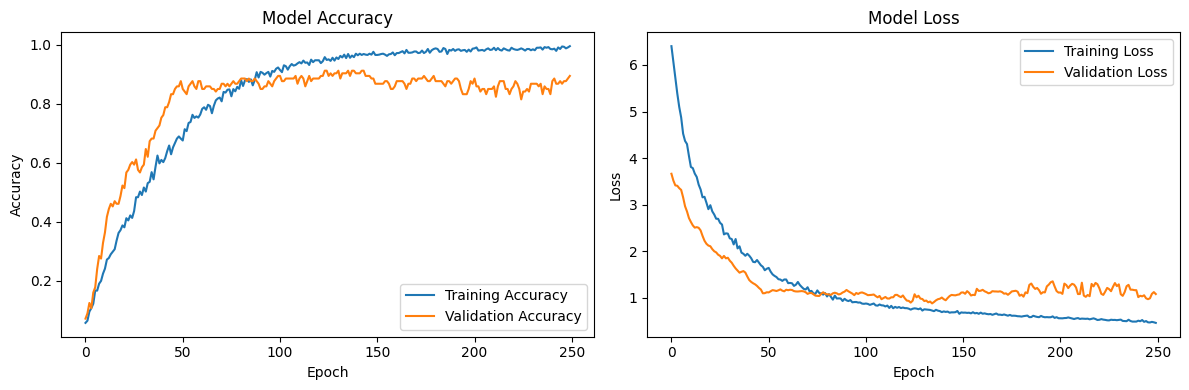

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.9190 - loss: 0.9458
Test Loss (Sebelum Fine-Tuning): 1.0789
Test Accuracy (Sebelum Fine-Tuning): 0.89
4/4 ━━━━━━━━━━━━━━━━━━━━ 45s 15s/step - accuracy: 0.8547 - loss: 0.9515
Test Loss (Sebelum Fine-Tuning): 1.0011
Test Accuracy (Sebelum Fine-Tuning): 0.87


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

##Percobaan kesepuluh

In [ ]:
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

from tensorflow.keras.regularizers import l2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
x = BatchNormalization()(x)
x = Dropout(0.8)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

with tf.device(GPU_DEVICE):
    history1 = model.fit(
        train_generator,
        epochs=250,
        validation_data=validation_generator,
    )

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.0522 - loss: 6.3005  

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 422s 11s/step - accuracy: 0.0524 - loss: 6.3004 - val_accuracy: 0.0708 - val_loss: 3.6790
Epoch 2/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 510ms/step - accuracy: 0.0752 - loss: 5.8655 - val_accuracy: 0.1062 - val_loss: 3.5188
Epoch 3/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 499ms/step - accuracy: 0.1025 - loss: 5.5049 - val_accuracy: 0.1504 - val_loss: 3.3414
Epoch 4/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 492ms/step - accuracy: 0.1097 - loss: 5.3300 - val_accuracy: 0.1947 - val_loss: 3.2331
Epoch 5/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 499ms/step - accuracy: 0.1397 - loss: 5.0252 - val_accuracy: 0.2301 - val_loss: 3.1242
Epoch 6/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.1563 - loss: 4.8340 - val_accuracy: 0.3097 - val_loss: 2.9483
Epoch 7/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 501ms/step - accuracy: 0.1741 - loss: 4.2861 - val_accuracy: 0.3186 - val_loss: 2.8179
Epoch 8/250
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 496ms/step - accuracy: 0.2015 - loss: 4.1563 - val_accuracy:

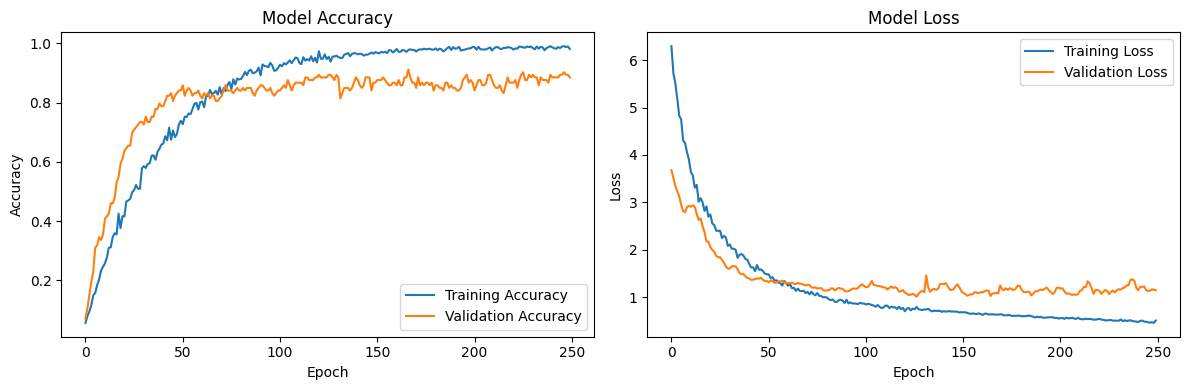

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.8936 - loss: 1.1498
Test Loss (Sebelum Fine-Tuning): 1.1424
Test Accuracy (Sebelum Fine-Tuning): 0.88
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.9006 - loss: 0.6856
Test Loss (Sebelum Fine-Tuning): 0.7032
Test Accuracy (Sebelum Fine-Tuning): 0.89


In [ ]:
# Plot hasil training
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss (Sebelum Fine-Tuning): {test_loss:.4f}')
print(f'Test Accuracy (Sebelum Fine-Tuning): {test_accuracy:.2f}')